IMPORTS Y DEFINICIONES GLOBALES

In [70]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from jcm_lib import fases,concurrence_ali
import matplotlib as mpl
from entrelazamiento_lib import negativity_hor

e=basis(2,0)
gr=basis(2,1)

N_c=4

e0=tensor(e,basis(N_c,0)) #1
e1=tensor(e,basis(N_c,1)) #2
g0=tensor(gr,basis(N_c,0)) #3
g1=tensor(gr,basis(N_c,1)) #4
g2=tensor(gr,basis(N_c,2)) 

sz=tensor(sigmaz(),qeye(N_c))
sx=tensor(sigmax(),qeye(N_c))
sy=tensor(sigmay(),qeye(N_c))
sp=tensor(sigmap(),qeye(N_c))
sm=tensor(sigmam(),qeye(N_c))
a=tensor(qeye(2),destroy(N_c))

w_0=1
g=0.001*w_0

In [71]:
def omega_n(n_:int,delta:float):
    return np.sqrt(delta**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)+delta)/(2*omega_n(n_,delta)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)-delta)/(2*omega_n(n_,delta)))

ESFERA DE BLOCH

In [72]:
# '''---Esfera de bloch para enfoque cinematico---'''

# esfera=Bloch()
# esfera.make_sphere()
# esfera.clear()
# # esfera.set_point_marker(['o'])



# color=['blue','red','green','black']
# colors=mpl.colormaps['plasma'](np.linspace(0,1,4))
# for ind,delta in enumerate([0,g,2*g]):
#     t=np.linspace(0,2*np.pi/omega_n(1,delta))
#     c_b=-1j*np.sqrt(omega_n(1,delta)**2-delta**2)/omega_n(1,delta)*np.sin(omega_n(1,delta)*t/2)
#     c_a=(omega_n(1,delta)-delta)/(2*omega_n(1,delta))*np.exp(1j*omega_n(1,delta)*t/2)+(omega_n(1,delta)+delta)/(2*omega_n(1,delta))*np.exp(-1j*omega_n(1,delta)*t/2)
#     ux=np.real(c_b/c_a)
#     uy=np.imag(c_b/c_a)
#     px=(2*ux)/(1+ux**2+uy**2)
#     py=(2*uy)/(1+ux**2+uy**2)
#     pz=(1-ux**2-uy**2)/(1+ux**2+uy**2)
#     points=[px,py,pz]

#     esfera.add_points(points,'m',colors=colors[ind])


# esfera.view([-40,30])

# esfera.render()
# esfera.show()
# esfera.save('bloch cinematica.png')

'''---Fase de Berry---'''
# esfera=Bloch()
# esfera.make_sphere()
# esfera.clear()

# esfera.clear()
# esfera.set_point_marker(['o'])

# for inde,delta in enumerate([0,g,2*g]):
#     for omega in np.linspace(0,2*np.pi):
#         psi_plus=cos_theta_n(1,delta)*e+np.exp(-1j*omega)*sin_theta_n(1,delta)*gr
#         # psi_minus=-sin_theta_n(1,delta)*e0+np.exp(-1j*omega)*cos_theta_n(1,delta)*g1
#         vec = [expect(sigmax(), psi_plus),
#                 expect(sigmay(), psi_plus),
#                 expect(sigmaz(), psi_plus)]

#         esfera.add_points(vec,colors=colors[inde])

# esfera.render()
# # esfera.save('bloch berry.png')
# esfera.show()

'---Fase de Berry---'

In [73]:
# def pr(estado):
#     return estado.unit()*estado.unit().dag()
# def omega_n(n_:int,delta:float,chi:float):
#     return np.sqrt((delta-chi*(2*n_-1))**2+4*g**2*n_)
# sz_new=pr(e0)-pr(g1)
# sx_new=e0*g1.dag()+g1*e0.dag()

# sy_new=-1j*e0*g1.dag()+1j*g1*e0.dag()

# gamma=0.1*g
# p=0.005*gamma
# esfera=Bloch()
# esfera.make_sphere()
# esfera.clear()
# # esfera.set_point_marker(['o'])
# points=1000

# for inde,x,delta in zip([0],[0*g],[0*g]):
#     H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
#     '''---Simulacion numerica---'''
#     omega=np.sqrt(4*g**2+(delta-x)**2)
#     T=2*np.pi/omega
#     t_final=20*T
#     steps=15000
#     colors=[mpl.colormaps['winter'](np.linspace(0,1,len(range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))))),mpl.colormaps['viridis'](np.linspace(0,1,len(range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points)))))]

#     l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
#     t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
#     psi0=(e0+(1+1j*2)*g1).unit()

#     sol_d=mesolve(H,psi0,t,c_ops=l_ops)
#     fg_d,arg,eigenvals_t_d,psi_eig = fases(sol_d)
#     ciclos_bloch=20

#     expect_sx=[expect(sx_new,sol_d.states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     expect_sy=[expect(sy_new,sol_d.states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     expect_sz=[expect(sz_new,sol_d.states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]

#     esfera.add_points([expect_sx,expect_sy,expect_sz],'m',colors=colors[inde])

#     expect_sx=[expect(sx_new,psi_eig[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     expect_sy=[expect(sy_new,psi_eig[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     expect_sz=[expect(sz_new,psi_eig[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]

#     esfera.add_points([expect_sx,expect_sy,expect_sz],'m',colors=colors[inde])


# fig_e=plt.figure(figsize=(8,6))
# ax_e=fig_e.add_subplot()
# colors_e=mpl.colormaps['hot'](np.linspace(0,1,len(eigenvals_t_d[0])))
# for i1 in range(len(eigenvals_t_d[0])): 
#     ax_e.plot(t/T,eigenvals_t_d[:,i1],color=colors_e[i1])
# ax_e.set_xlabel('$t/T$')
# ax_e.set_ylabel(r'$E(\rho)$')
# plt.show()
# esfera.render()
# # esfera.save('bloch berry.png')
# esfera.show()

In [74]:
# def pr(estado):
#     return estado.unit()*estado.unit().dag()
# def omega_n(n_:int,delta:float,chi:float):
#     return np.sqrt((delta-chi*(2*n_-1))**2+4*g**2*n_)
# sz_new=pr(e0)-pr(g1)
# sx_new=e0*g1.dag()+g1*e0.dag()

# sy_new=-1j*e0*g1.dag()+1j*g1*e0.dag()

# gamma=0.0*g
# p=0.005*gamma
# esfera=Bloch()
# esfera.make_sphere()
# esfera.clear()
# # esfera.set_point_marker(['o'])
# points=1000
# x=0*g
# delta=0*g
# psi0=(e0+2*1j*g1).unit()#(np.sqrt(2+np.sqrt(2))/2*e0+1j*np.sqrt(2-np.sqrt(2))/2*g1).unit()
# H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
# omega=np.sqrt(4*g**2+(delta-x)**2)
# '''---Simulacion numerica---'''
# T=2*np.pi/omega
# t_final=20*T
# steps=15000

# colors=[mpl.colormaps['hot'](np.linspace(0,1,len(range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))))),mpl.colormaps['winter'](np.linspace(0,1,len(range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points)))))]


# fig_e=plt.figure(figsize=(8,6))
# ax_e=fig_e.add_subplot(211)
# ax_e.set_xlabel('$t/T$')
# ax_e.set_ylabel(r'$E(\rho)$')
# ax_fg=fig_e.add_subplot(212,sharex=ax_e)
# colors_fg=['blue','black','red']
# labels_fg=['u','d','d+']
# for inde,gamma in enumerate([0,0.1*g]):
#     l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
#     t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 


#     sol_d=mesolve(H,psi0,t,c_ops=l_ops)
#     fg_d,arg,eigenvals_t_d,psi_eig = fases(sol_d)
#     ciclos_bloch=20

#     expect_sx=[expect(sx_new,psi_eig[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     expect_sy=[expect(sy_new,psi_eig[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     expect_sz=[expect(sz_new,psi_eig[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     esfera.add_points([expect_sx,expect_sy,expect_sz],'m',colors=colors[inde])

#     expect_sx=[expect(sx_new,sol_d.states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     expect_sy=[expect(sy_new,sol_d.states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     expect_sz=[expect(sz_new,sol_d.states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
#     esfera.add_points([expect_sx,expect_sy,expect_sz],'m',colors=colors[inde])

#     colors_e=mpl.colormaps['hot'](np.linspace(0,1,len(eigenvals_t_d[0])))
#     for i1 in range(len(eigenvals_t_d[0])): 
#         ax_e.plot(t/T,eigenvals_t_d[:,i1],color=colors_e[i1])

#     ax_fg.plot(t/T,fg_d,color=colors_fg[inde],label=labels_fg[inde])

# ax_e.set_xlabel('$t/T$')
# ax_e.set_ylabel(r'$\phi_g$')
# ax_fg.legend()
# plt.show()
# esfera.render()
# # esfera.save('bloch berry.png')
# esfera.show()

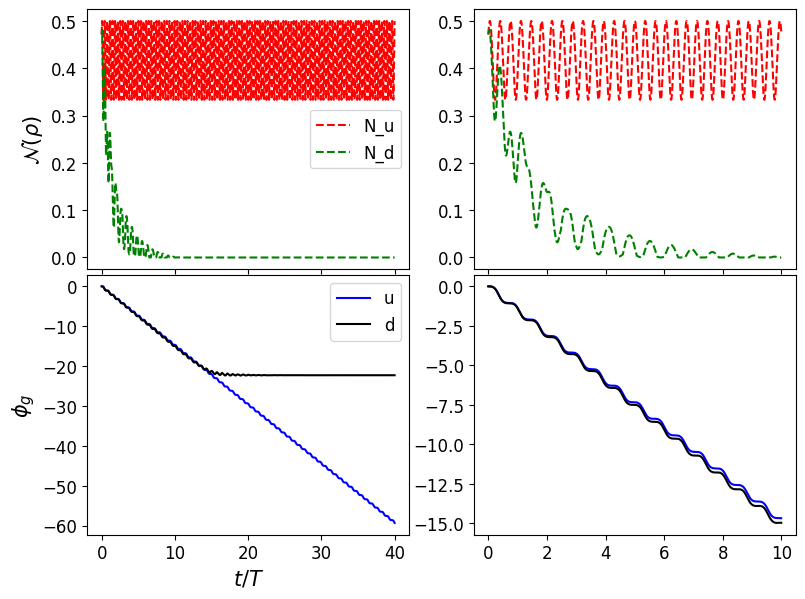

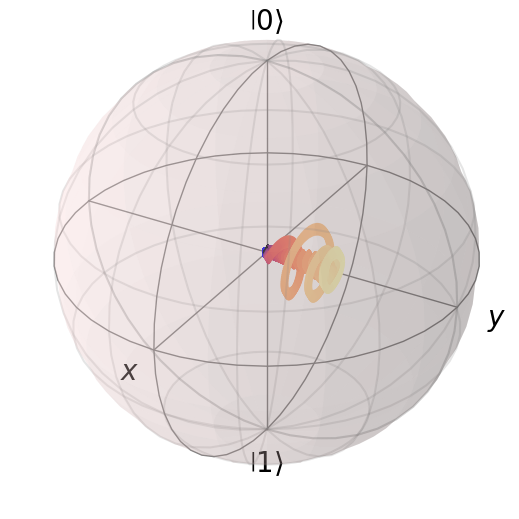

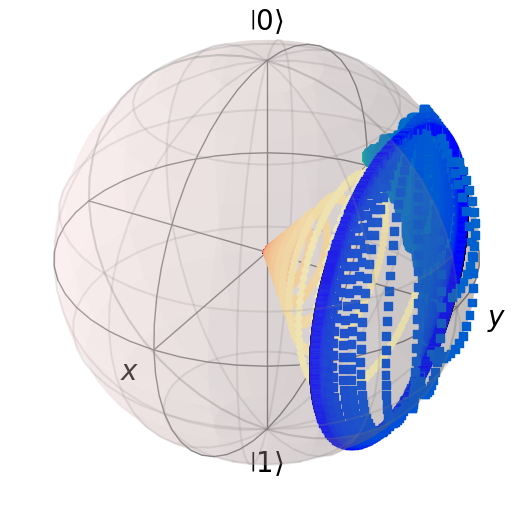

In [ ]:
def pr(estado):
    return estado.unit()*estado.unit().dag()
def omega_n(n_:int,delta:float,chi:float):
    return np.sqrt((delta-chi*(2*n_-1))**2+4*g**2*n_)

def vectorBloch(v1,v2,sol_states,steps,ciclos_bloch,T,t_final,points):
    sz_1=pr(v1)-pr(v2)
    sx_1=v1*v2.dag()+v2*v1.dag()

    sy_1=-1j*v1*v2.dag()+1j*v2*v1.dag()

    expect_sx_1=[expect(sx_1,sol_states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
    expect_sy_1=[expect(sy_1,sol_states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
    expect_sz_1=[expect(sz_1,sol_states[i]) for i in range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))]
    return [expect_sx_1,expect_sy_1,expect_sz_1]


gamma=0.1*g
p=0.1*0.1*g

# esfera.set_point_marker(['o'])
points=5000
x=0*g
delta=0.0001*g
psi0=(e1+(1+1j)*g2).unit()#(np.sqrt(2+np.sqrt(2))/2*e0+1j*np.sqrt(2-np.sqrt(2))/2*g1).unit()
H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
omega=np.sqrt(4*g**2+(delta-x)**2)
'''---Simulacion numerica---'''
T=2*np.pi/omega
t_final=40*T
steps=15000
ciclos_bloch=40
colors=[mpl.colormaps['viridis'](np.linspace(0,1,len(range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))))),mpl.colormaps['winter'](np.linspace(0,1,len(range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points))))),mpl.colormaps['magma'](np.linspace(0,1,len(range(0,int(steps*ciclos_bloch*T/t_final),int(steps*ciclos_bloch*T/t_final/points)))))]


fig_e=plt.figure(figsize=(8,6))
ax_e=fig_e.add_subplot(221)
ax_e_zoom=fig_e.add_subplot(222,sharey=ax_e)
ax_e.set_xlabel('$t/T$')
ax_e.set_ylabel(r'$\mathcal{N}(\rho)$')
# ax_e.set_ylabel(r'$E(\rho)$')
ax_fg=fig_e.add_subplot(223,sharex=ax_e)
ax_fg_zoom=fig_e.add_subplot(224,sharex=ax_e_zoom)
colors_fg=['blue','black','red']
labels_fg=['u','d','d+']

l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 


sol_u=mesolve(H,psi0,t)
sol_d=mesolve(H,psi0,t,c_ops=l_ops)

fg_u,arg,eigenvals_t_d,psi_eig_u = fases(sol_u)
fg_d,arg,eigenvals_t_d,psi_eig_d = fases(sol_d)

N_u=np.array([negativity_hor(sol_u.states[i],[0,1]) for i in range(len(sol_u.states))])
N_d=np.array([negativity_hor(sol_d.states[i],[0,1]) for i in range(len(sol_d.states))])

# C_u=concurrence_ali(sol_u.states)
# C_d=concurrence_ali(sol_d.states)

vBloch_u=vectorBloch(e0,g1,sol_u.states,steps,ciclos_bloch,T,t_final,points)
vBloch_eigevec=vectorBloch(e0,g1,psi_eig_d,steps,ciclos_bloch,T,t_final,points)
vBloch_d=vectorBloch(e0,g1,sol_d.states,steps,ciclos_bloch,T,t_final,points)
esfera1=Bloch()
esfera1.make_sphere()
esfera1.clear()
esfera1.add_points(vBloch_u,'m',colors='black')
esfera1.add_points(vBloch_eigevec,'m',colors=colors[1])
esfera1.add_points(vBloch_d,'m',colors=colors[2])

vBloch_u=vectorBloch(e1,g2,sol_u.states,steps,ciclos_bloch,T,t_final,points)
vBloch_eigevec=vectorBloch(e1,g2,psi_eig_d,steps,ciclos_bloch,T,t_final,points)
vBloch_d=vectorBloch(e1,g2,sol_d.states,steps,ciclos_bloch,T,t_final,points)
esfera2=Bloch()
esfera2.make_sphere()
esfera2.clear()
esfera2.add_points(vBloch_u,'m',colors='black')
esfera2.add_points(vBloch_eigevec,'m',colors=colors[1])
esfera2.add_points(vBloch_d,'m',colors=colors[2])

zoom_steps=int(steps/4)
# colors_e=mpl.colormaps['hot'](np.linspace(0,1,len(eigenvals_t_d[0])))
# for i1 in range(len(eigenvals_t_d[0])): 
#     ax_e.plot(t/T,eigenvals_t_d[:,i1],color=colors_e[i1])
#     ax_e_zoom.plot(t[:zoom_steps]/T,eigenvals_t_d[:zoom_steps,i1],color=colors_e[i1])

# ax_e.plot(t/T,C_u,color=colors_fg[0],label=labels_fg[0])
# ax_e.plot(t/T,C_d,color=colors_fg[1],label=labels_fg[1])

ax_e.plot(t/T,N_u,color='red',linestyle='dashed',label='N_u')
ax_e.plot(t/T,N_d,color='green',linestyle='dashed',label='N_d')

# ax_e_zoom.plot(t[:zoom_steps]/T,C_u[:zoom_steps],color=colors_fg[0],label=labels_fg[0])
# ax_e_zoom.plot(t[:zoom_steps]/T,C_d[:zoom_steps],color=colors_fg[1],label=labels_fg[1])

ax_e_zoom.plot(t[:zoom_steps]/T,N_u[:zoom_steps],color='red',linestyle='dashed',label='N_u')
ax_e_zoom.plot(t[:zoom_steps]/T,N_d[:zoom_steps],color='green',linestyle='dashed',label='N_d')

ax_fg.plot(t/T,fg_u,color=colors_fg[0],label=labels_fg[0])
ax_fg.plot(t/T,fg_d,color=colors_fg[1],label=labels_fg[1])

ax_fg_zoom.plot(t[:zoom_steps]/T,fg_u[:zoom_steps],color=colors_fg[0],label=labels_fg[0])
ax_fg_zoom.plot(t[:zoom_steps]/T,fg_d[:zoom_steps],color=colors_fg[1],label=labels_fg[1])

ax_fg.set_xlabel('$t/T$')
ax_fg.set_ylabel(r'$\phi_g$')
ax_fg.legend()
ax_e.legend()
plt.show()
esfera1.render()
# esfera.save('bloch berry.png')
esfera1.show()
esfera2.render()
# esfera.save('bloch berry.png')
esfera2.show()

In [76]:
def heatplot(t,y,z_data:list,title:str,ylabel):
    fig_u=plt.figure(figsize=(8,6))
    fig_u.suptitle(title)
    ax_u=fig_u.add_subplot()
    ax_u.set_xlabel('$t/T$')
    ax_u.set_ylabel(ylabel)
    c0 = ax_u.pcolor(t/T, y, z_data, shading='auto', cmap='jet',vmin=0,vmax=0.5)
    contour_u = ax_u.contourf(t/T, y, z_data,levels=[0,0.01],colors='black',linewidths=1)
    ax_u.clabel(contour_u, fmt="%.1f",colors='red',fontsize=10)
    fig_u.colorbar(c0, ax=ax_u,shrink=0.7)
    # fig_u.savefig(rf'graficos\negativity\{psi0Name} {title} x={x/g}g k={k/g}g J={J/g}g neg delta dis.png')

C:\Users\alima\AppData\Local\Temp\ipykernel_5536\179498990.py:8: UserWarning: linewidths is ignored by contourf
  contour_u = ax_u.contourf(t/T, y, z_data,levels=[0,0.01],colors='black',linewidths=1)


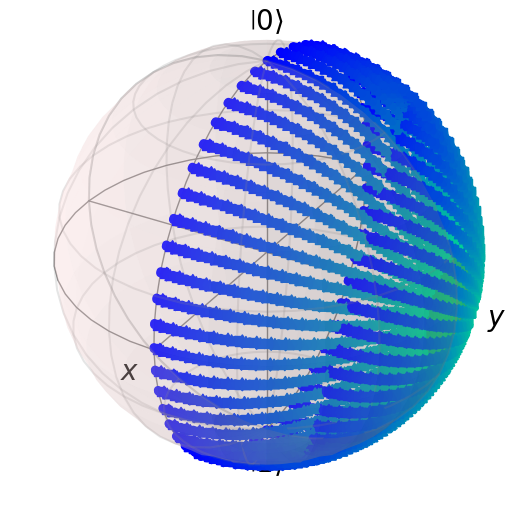

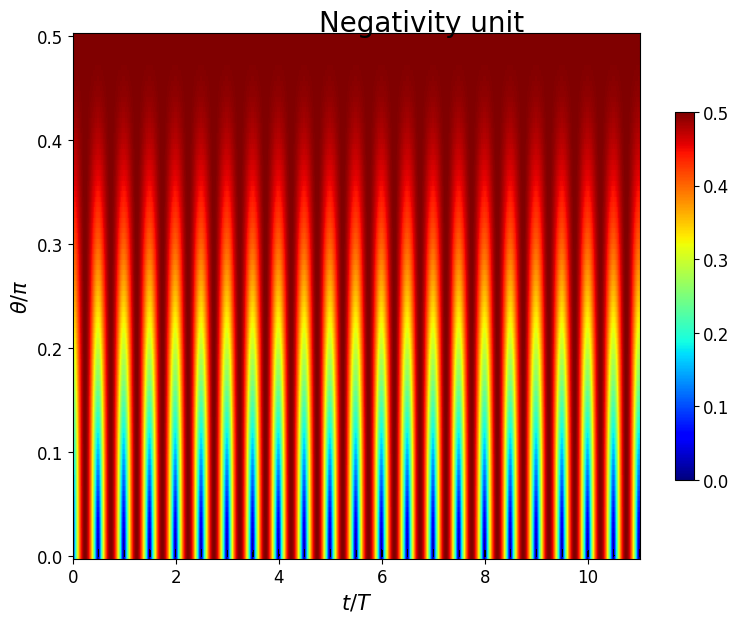

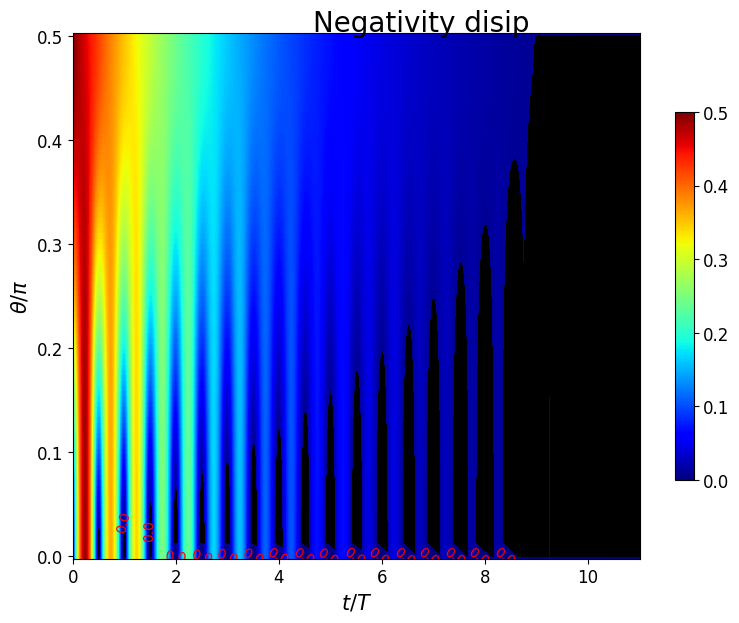

In [78]:
esfera=Bloch()
esfera.make_sphere()
esfera.clear()

#Parametros y Hamiltoniano

x=0*g
delta=0*g

H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
omega=np.sqrt(4*g**2+(delta-x)**2)

# Simulacion numerica

T=2*np.pi/omega
t_final=11*T
steps=4000

ciclos_bloch=2
points=100

# Barrido de condiciones iniciales

num_tita=100
tita_array=np.linspace(0,np.pi/2,num_tita)
colors=mpl.colormaps['winter'](np.linspace(0,1,num_tita)) #colores para pintar en la esfera de bloch

#definimos los arrays de negatividad

N_u=np.zeros((num_tita,steps))
N_d=np.zeros((num_tita,steps))


#ahora hacemos el barrido
#paara cada valor de tita hacemos una simulacion y calculamos 
for j,tita in enumerate(tita_array):
    psi0=np.cos(tita/2)*e0+np.sin(tita/2)*g1
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 

    sol_u=mesolve(H,psi0,t)
    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    fg_u,arg,eigenvals_t_d,psi_eig_u = fases(sol_u)
    fg_d,arg,eigenvals_t_d,psi_eig_d = fases(sol_d)

    N_u[j]=np.array([negativity_hor(sol_u.states[i],[0,1]) for i in range(len(sol_u.states))])
    N_d[j]=np.array([negativity_hor(sol_d.states[i],[0,1]) for i in range(len(sol_d.states))])

    vBloch_tita=vectorBloch(e0,g1,sol_u.states,steps,ciclos_bloch,T,t_final,points)
    esfera.add_points(vBloch_tita,'m',colors=colors[j])

# print(N_d)
heatplot(t,tita_array/np.pi,N_u,'Negativity unit',r"$\theta/\pi$")  
heatplot(t,tita_array/np.pi,N_d,'Negativity disip',r"$\theta/\pi$")  
# heatplot(t,tita_array/np.pi,fg_u/np.pi,r'$\phi_g$ uni',r"$\phi_g/\pi$")
# heatplot(t,tita_array/np.pi,fg_d/np.pi,r'$\phi_g$ dis',r"$\phi_g/\pi$")
# heatplot(t,tita_array/np.pi,(fg_u-fg_d)/np.pi,r'$\delta\phi$ dis',r"$\phi_g/\pi$")

esfera.render()
# esfera.save('bloch berry.png')
esfera.show()

DISIPATIVO Y REPRODUCCION DE GRAFICOS LUDMI

<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\p'
<>:81: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\p'
C:\Users\alima\AppData\Local\Temp\ipykernel_17688\3899302171.py:81: SyntaxWarning: invalid escape sequence '\p'
  ax1_fg.set_ylabel('$\phi/\pi$',size=20)
C:\Users\alima\AppData\Local\Temp\ipykernel_17688\3899302171.py:83: SyntaxWarning: invalid escape sequence '\p'
  ax2_fg.set_ylabel('$\phi/\pi$',size=20)


55536.03672697958


ValueError: too many values to unpack (expected 3)

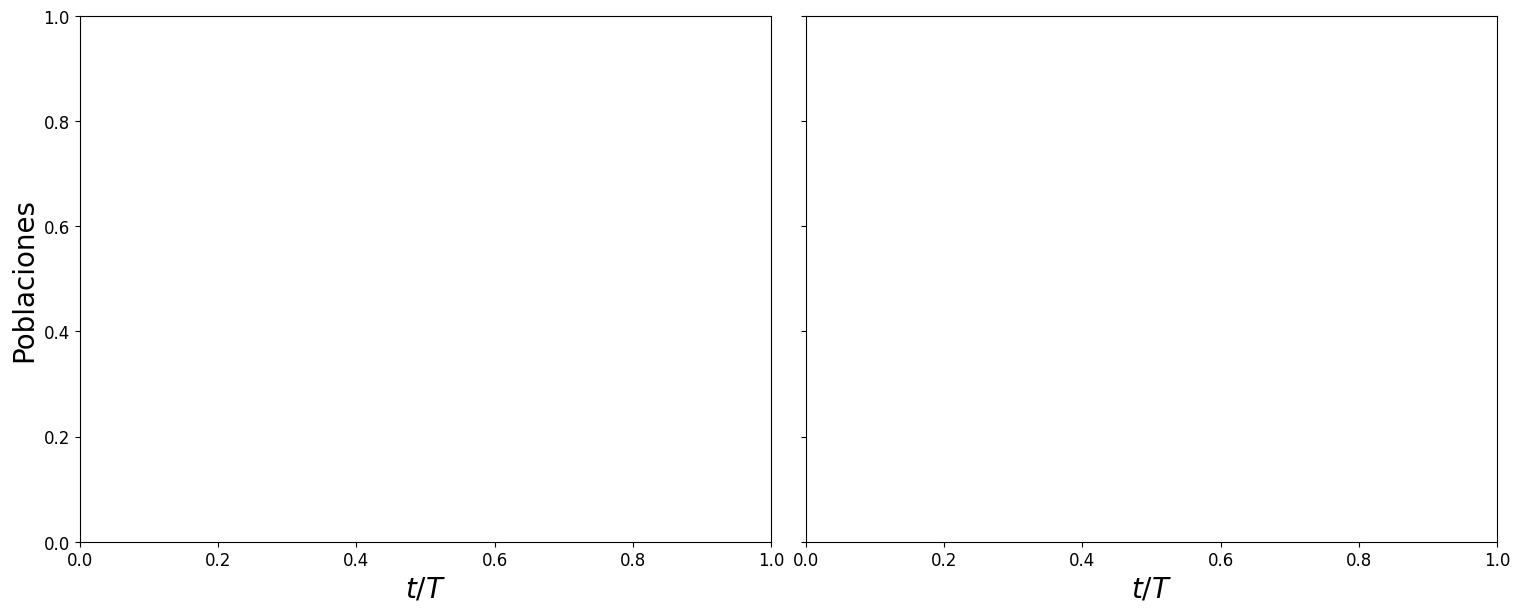

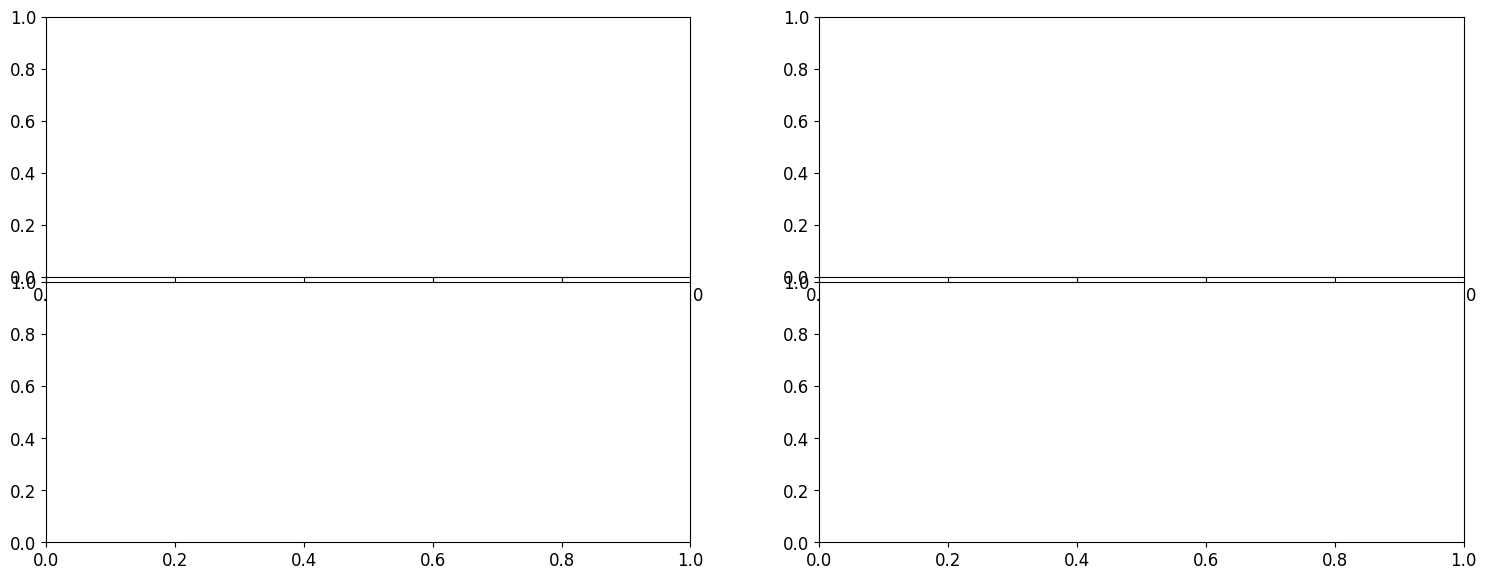

In [ ]:
gamma=0.1*g
p=0.05*gamma
delta=2*g

fig=plt.figure(figsize=(16,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
fig.subplots_adjust(wspace=0.05)

ax=[ax1,ax2]
ax1.set_xlabel('$t/T$',size=20)
ax2.set_xlabel('$t/T$',size=20)
ax1.set_ylabel('Poblaciones',size=20)
ax2.set_yticklabels([])

# esfera1=Bloch()
# esfera1.make_sphere()
# esfera1.clear()

# esfera2=Bloch()
# esfera2.make_sphere()
# esfera2.clear()

# esferas=[esfera1,esfera2]

fig_fg=plt.figure(figsize=(16,6))
ax1_fg=fig_fg.add_subplot(221)
ax2_fg=fig_fg.add_subplot(222)
ax1_concu=fig_fg.add_subplot(223)
ax2_concu=fig_fg.add_subplot(224)
ax_fg=[ax1_fg,ax2_fg]
ax_concu=[ax1_concu,ax2_concu]
colors=mpl.colormaps['plasma'](np.linspace(0,1,5))
for j,gamma in enumerate([0.1*g,2*g]):
    H=delta/2*sz + g*(a.dag()*sm+a*sp)

    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta,0)
    t_final=25*T
    print(t_final)
    steps=20000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    concu=concurrence(sol_d.states)
    # prob_g0=[expect(sol_d.states[i],g0*g0.dag()) for i in range(len(sol_d.states))]
    # prob_g1=[expect(sol_d.states[i],g1*g1.dag()) for i in range(len(sol_d.states))]
    # prob_e0=[expect(sol_d.states[i],e0*e0.dag()) for i in range(len(sol_d.states))]

    # # print(sol_d.states[1])
    # expect_sz=[expect(sol_d.states[i],sz) for i in range(len(sol_d.states))]
    # expect_sx=[expect(sol_d.states[i],sx) for i in range(len(sol_d.states))]
    # expect_sy=[expect(sol_d.states[i],sy) for i in range(len(sol_d.states))]
    # # vec=[[expect(sol_d.states[i],sz),expect(sol_d.states[i],sz),expect(sol_d.states[i],sz)] for i in range(len(sol_d.states))]
    # vec=[expect_sx,expect_sy,expect_sz]
    fg_d,arg,eigenvals_t_d = fases(sol_d)
    ax_fg[j].plot(t/T,fg_d/np.pi,color='black')
    ax_concu[j].plot(t/T,concu,color='black')
    # ax[j].plot(t/T,prob_g0,color='blue')
    ax[j].plot(t/T,[sol_d.states[i][0][0] for i in range(len(sol_d.states))],color=colors[1],label='e0')
    ax[j].plot(t/T,[sol_d.states[i][2][2] for i in range(len(sol_d.states))],color=colors[0],label='g0')
    ax[j].plot(t/T,[sol_d.states[i][3][3] for i in range(len(sol_d.states))],color=colors[3],label='g1')
    ax[j].plot(t/T,[np.abs(sol_d.states[i][0][3]) for i in range(len(sol_d.states))],color=colors[2],linestyle='dashed',label='$C_{e0,g1}')
    
    # ax[j].plot(t/T,prob_g1,color='red')
    # ax[j].plot(t/T,prob_e0,color='green')
    # esferas[j].add_points(vec)
    # plt.plot(t/T,fg_d/np.pi)
ax1.set_xlim(0,25)
ax2.set_xlim(0,8)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_title('(a) SC',size=20)
ax2.set_title('(b) WC',size=20)
ax1_concu.set_ylim(0,1)
ax2_concu.set_ylim(0,1)
ax1_fg.set_title('(a) SC',size=20)
ax2_fg.set_title('(b) WC',size=20)
ax1_fg.set_ylabel('$\phi/\pi$',size=20)
ax1_concu.set_ylabel('$C_{AF}$',size=20)
ax2_fg.set_ylabel('$\phi/\pi$',size=20)
ax2_concu.set_ylabel('$C_{AF}$',size=20)
ax1_concu.set_xlabel('$t/T$',size=20)
ax2_concu.set_xlabel('$t/T$',size=20)
# esfera1.render()
# esfera1.show()
# esfera2.render()
# esfera2.show()

KERR

UNITARIO BLOCH, AUTOESTADOS Y AUTOENERGIAS

POBLACIONES

<>:84: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:84: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
C:\Users\alima\AppData\Local\Temp\ipykernel_6652\802337672.py:84: SyntaxWarning: invalid escape sequence '\p'
  ax1_fg.set_ylabel('$\phi/\pi$',size=20)
C:\Users\alima\AppData\Local\Temp\ipykernel_6652\802337672.py:86: SyntaxWarning: invalid escape sequence '\p'
  ax2_fg.set_ylabel('$\phi/\pi$',size=20)


70248.14731040728


C:\Users\alima\AppData\Local\Temp\ipykernel_6652\802337672.py:84: SyntaxWarning: invalid escape sequence '\p'
  ax1_fg.set_ylabel('$\phi/\pi$',size=20)
C:\Users\alima\AppData\Local\Temp\ipykernel_6652\802337672.py:86: SyntaxWarning: invalid escape sequence '\p'
  ax2_fg.set_ylabel('$\phi/\pi$',size=20)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20000,) + inhomogeneous part.

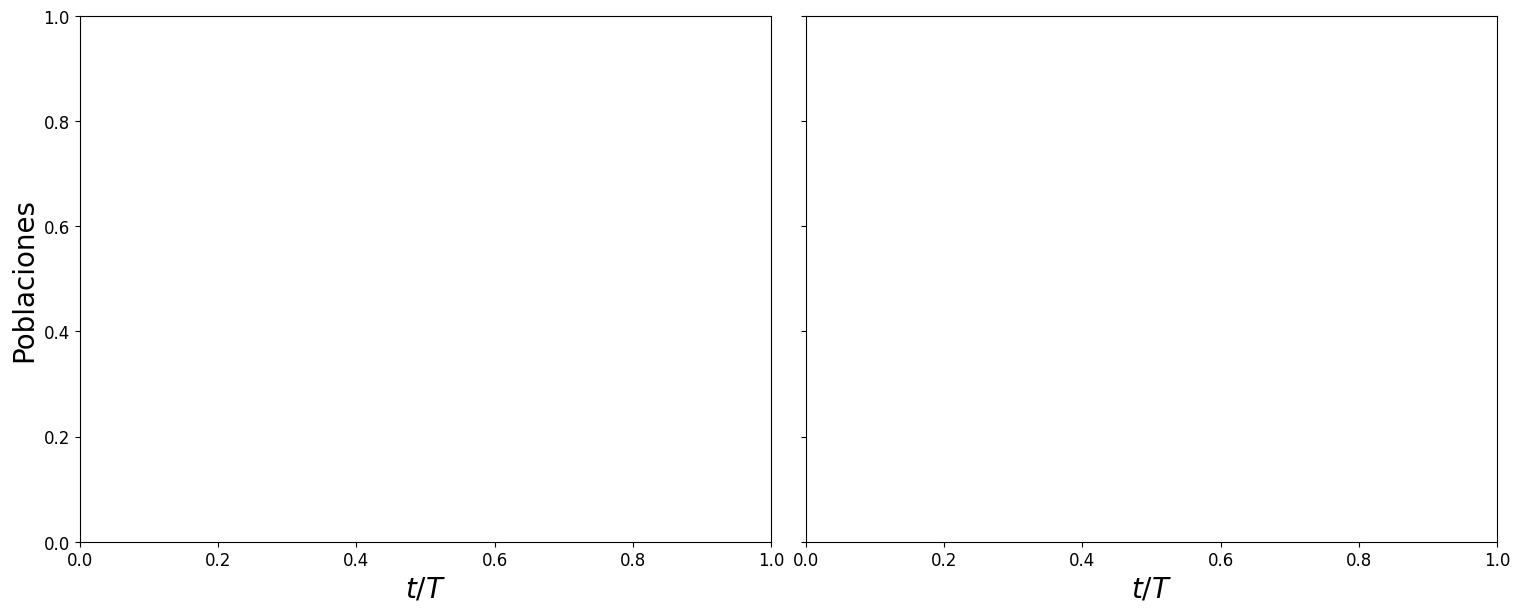

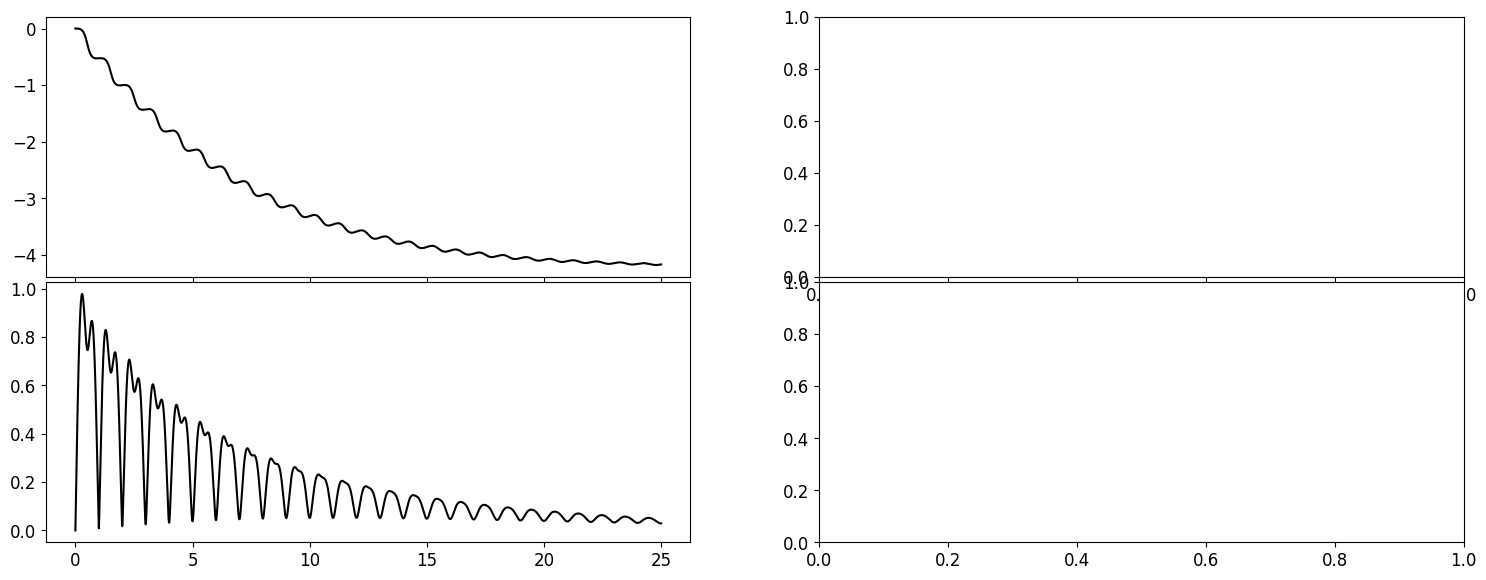

In [ ]:
gamma=0.1*g
p=0.005*g
delta=2*g
x=g

fig=plt.figure(figsize=(16,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
fig.subplots_adjust(wspace=0.05)

ax=[ax1,ax2]
ax1.set_xlabel('$t/T$',size=20)
ax2.set_xlabel('$t/T$',size=20)
ax1.set_ylabel('Poblaciones',size=20)
ax2.set_yticklabels([])

# esfera1=Bloch()
# esfera1.make_sphere()
# esfera1.clear()

# esfera2=Bloch()
# esfera2.make_sphere()
# esfera2.clear()

# esferas=[esfera1,esfera2]

fig_fg=plt.figure(figsize=(16,6))
ax1_fg=fig_fg.add_subplot(221)
ax2_fg=fig_fg.add_subplot(222)
ax1_concu=fig_fg.add_subplot(223)
ax2_concu=fig_fg.add_subplot(224)
ax_fg=[ax1_fg,ax2_fg]
ax_concu=[ax1_concu,ax2_concu]
colors=mpl.colormaps['plasma'](np.linspace(0,1,5))

for j,gamma in enumerate([0.1*g,2*g]):
    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)

    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta,x)
    t_final=25*T
    print(t_final)
    steps=20000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    concu=concurrence(sol_d.states)
    # prob_g0=[expect(sol_d.states[i],g0*g0.dag()) for i in range(len(sol_d.states))]
    # prob_g1=[expect(sol_d.states[i],g1*g1.dag()) for i in range(len(sol_d.states))]
    # prob_e0=[expect(sol_d.states[i],e0*e0.dag()) for i in range(len(sol_d.states))]

    # # print(sol_d.states[1])
    # expect_sz=[expect(sol_d.states[i],sz) for i in range(len(sol_d.states))]
    # expect_sx=[expect(sol_d.states[i],sx) for i in range(len(sol_d.states))]
    # expect_sy=[expect(sol_d.states[i],sy) for i in range(len(sol_d.states))]
    # # vec=[[expect(sol_d.states[i],sz),expect(sol_d.states[i],sz),expect(sol_d.states[i],sz)] for i in range(len(sol_d.states))]
    # vec=[expect_sx,expect_sy,expect_sz]
    fg_d,arg,eigenvals_t_d = fases(sol_d)
    ax_fg[j].plot(t/T,fg_d/np.pi,color='black')
    ax_concu[j].plot(t/T,concu,color='black')
    # ax[j].plot(t/T,prob_g0,color='blue')
    e0=[sol_d.states[i][0][0] for i in range(len(sol_d.states))]
    ax[j].plot(t/T,e0,color=colors[1],label='e0')
    ax[j].plot(t/T,[sol_d.states[i][2][2] for i in range(len(sol_d.states))],color=colors[0],label='g0')
    ax[j].plot(t/T,[sol_d.states[i][3][3] for i in range(len(sol_d.states))],color=colors[3],label='g1')
    ax[j].plot(t/T,[np.abs(sol_d.states[i][0][3]) for i in range(len(sol_d.states))],color=colors[2],linestyle='dashed',label='$C_{e0,g1}')
    
    # ax[j].plot(t/T,prob_g1,color='red')
    # ax[j].plot(t/T,prob_e0,color='green')
    # esferas[j].add_points(vec)
    # plt.plot(t/T,fg_d/np.pi)
ax1.set_xlim(0,25)
ax2.set_xlim(0,8)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_title('(a) SC',size=20)
ax2.set_title('(b) WC',size=20)
ax1_concu.set_ylim(0,1)
ax2_concu.set_ylim(0,1)
ax1_fg.set_title('(a) SC',size=20)
ax2_fg.set_title('(b) WC',size=20)
ax1_fg.set_ylabel('$\phi/\pi$',size=20)
ax1_concu.set_ylabel('$C_{AF}$',size=20)
ax2_fg.set_ylabel('$\phi/\pi$',size=20)
ax2_concu.set_ylabel('$C_{AF}$',size=20)
ax1_concu.set_xlabel('$t/T$',size=20)
ax2_concu.set_xlabel('$t/T$',size=20)
# esfera1.render()
# esfera1.show()
# esfera2.render()
# esfera2.show()

FG DEPENDENCIA CON EL ACOPLAMIENTO

<>:65: SyntaxWarning: invalid escape sequence '\p'
<>:65: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_7980\1219265014.py:65: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

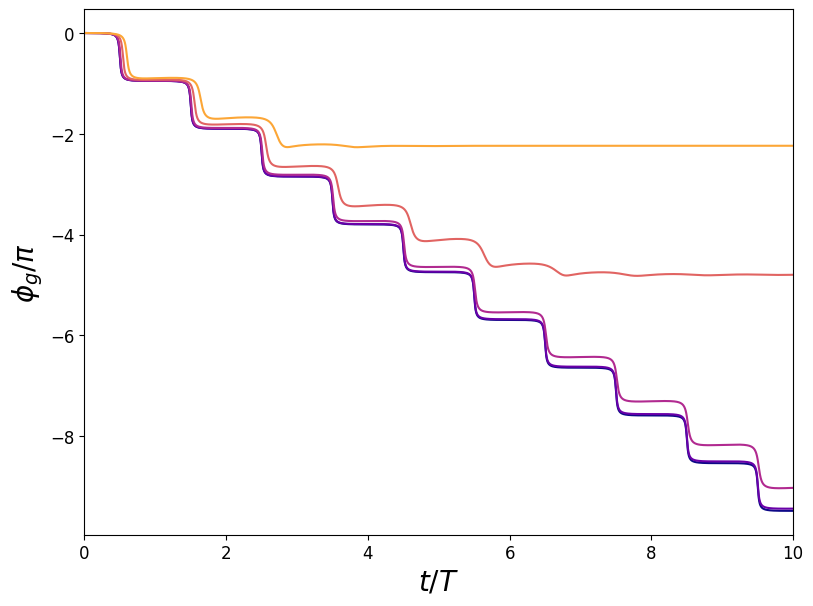

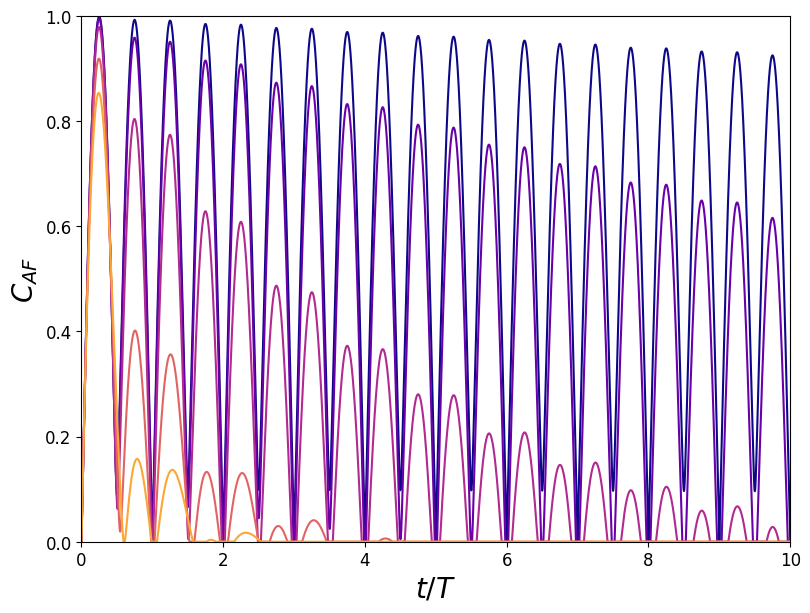

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from jcm_lib import fases,concurrence
from matplotlib import colormaps

e=basis(2,0)
gr=basis(2,1)

e0=tensor(e,basis(2,0)) #1
e1=tensor(e,basis(2,1)) #2
g0=tensor(gr,basis(2,0)) #3
g1=tensor(gr,basis(2,1)) #4

sz=tensor(sigmaz(),qeye(2))
sx=tensor(sigmax(),qeye(2))
sy=tensor(sigmay(),qeye(2))
sp=tensor(sigmap(),qeye(2))
sm=tensor(sigmam(),qeye(2))
a=tensor(qeye(2),destroy(2))

w_0=1
g=0.001*w_0
delta=0.1*g
p=0.005*g
x=0

def omega_n(n_:int,delta:float):
    return np.sqrt(delta**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)+delta)/(2*omega_n(n_,delta)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta)-delta)/(2*omega_n(n_,delta)))

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
fig_concu=plt.figure(figsize=(8,6))
ax_concu=fig_concu.add_subplot()
colors=colormaps['plasma'](np.linspace(0,1,6))
for i,gamma in enumerate([0,0.01*g,0.1*g,0.5*g,g]):

    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
    
    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta)
    t_final=10*T
    steps=10000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    ax_concu.plot(t/T,concu,color=colors[i])

ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,10)
ax_concu.set_xlim(0,10)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
ax_concu.set_ylabel('$C_{AF}$',size=20)

ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)


INTENTO DE HACER EL FORMAL

In [ ]:
def fg_formal(sol_states:list,t_final:float,steps:float,g:float,delta:float,gamma:float):
    dt=t_final/steps
    fg=np.zeros(len(sol_states))
    rho22_a=0
    rho12_a=0
    rho11_a=1
    dot_rho_12_a=-1j*g*(rho22_a-rho11_a)-(1j*delta+0.5*gamma)*rho12_a
    e_a=0.5*(rho11_a+rho22_a+np.sqrt((rho11_a-rho22_a)**2+4*rho12_a*np.conjugate(rho12_a)))
    for i in range(1,len(sol_states)):
        rho22=sol_states[i][3][3]
        rho11=sol_states[i][0][0]
        rho12=sol_states[i][0][3]

        dot_rho_12=-1j*g*(rho22-rho11)-(1j*delta+0.5*gamma)*rho12
        e=0.5*(rho11+rho22+np.sqrt((rho11-rho22)**2+4*rho12*np.conjugate(rho12))) 

        fg[i]+=fg[i-1]+0.5*dt*(np.imag(dot_rho_12*np.conjugate(rho12))/((rho22-e)**2+np.conjugate(rho12)*rho12)+np.imag(dot_rho_12_a*np.conjugate(rho12_a))/((rho22_a-e_a)**2+np.conjugate(rho12_a)*rho12_a))

        rho22_a=rho22
        rho12_a=rho12
        rho11_a=rho11
        dot_rho_12_a=dot_rho_12
        e_a=e
    return fg

w_0=1
g=0.001*w_0
p=0.005*g
x=0
gamma=0.1*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)+delta)/(2*omega_n(n_,delta,0)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)-delta)/(2*omega_n(n_,delta,0)))

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta=[0.000001*g,0.1*g,0.25*g,0.5*g,g]
colors=colormaps['plasma'](np.linspace(0,1,len(delta)+1))
for i,delta in enumerate(delta):

    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
    
    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta,x)
    t_final=7*T
    steps=100000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    

    fg = fg_formal(sol_d.states,t_final,steps,g,delta,gamma)

    ax_fg.plot(t/T,fg/np.pi,color=colors[i])


ax_fg.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)


<>:66: SyntaxWarning: invalid escape sequence '\p'
<>:66: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_13936\2901589761.py:66: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_13936\2901589761.py:66: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


NameError: name 'plt' is not defined

DEPENDENCIA CON EL DETUNNING 1

<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_7980\864684445.py:46: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

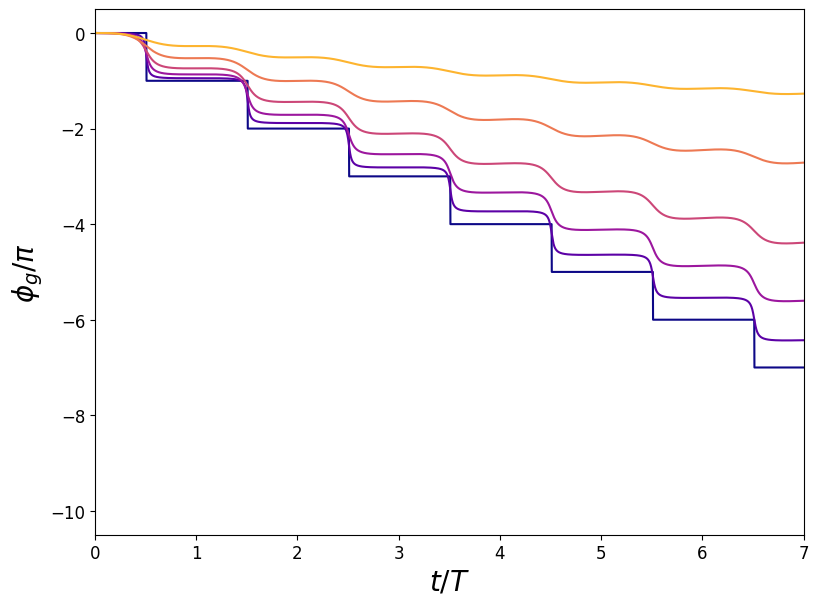

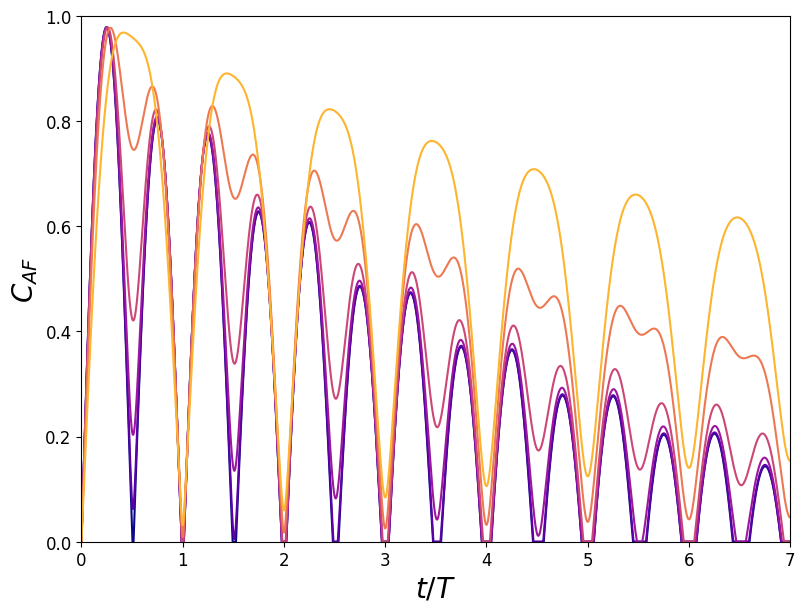

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g
x=0
gamma=0.1*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)+delta)/(2*omega_n(n_,delta,0)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)-delta)/(2*omega_n(n_,delta,0)))

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
fig_concu=plt.figure(figsize=(8,6))
ax_concu=fig_concu.add_subplot()
delta=[0.0000000001*g,0.1*g,0.25*g,0.5*g,g,2*g]

colors=colormaps['plasma'](np.linspace(0,1,len(delta)+1))
for i,delta in enumerate(delta):

    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
    
    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta,x)
    t_final=10*T
    steps=10000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    ax_concu.plot(t/T,concu,color=colors[i])

ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,7)
ax_concu.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
ax_concu.set_ylabel('$C_{AF}$',size=20)

ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)


FG DEPENDENCIA CON EL DETUNNING 2

DEPENDENCIA CON EL KERR

<>:44: SyntaxWarning: invalid escape sequence '\p'
<>:44: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_2000\3598108656.py:44: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

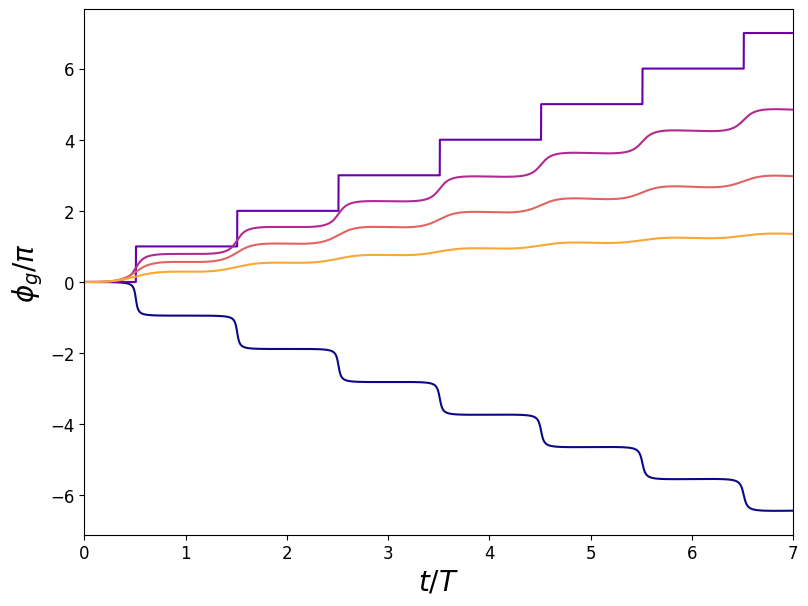

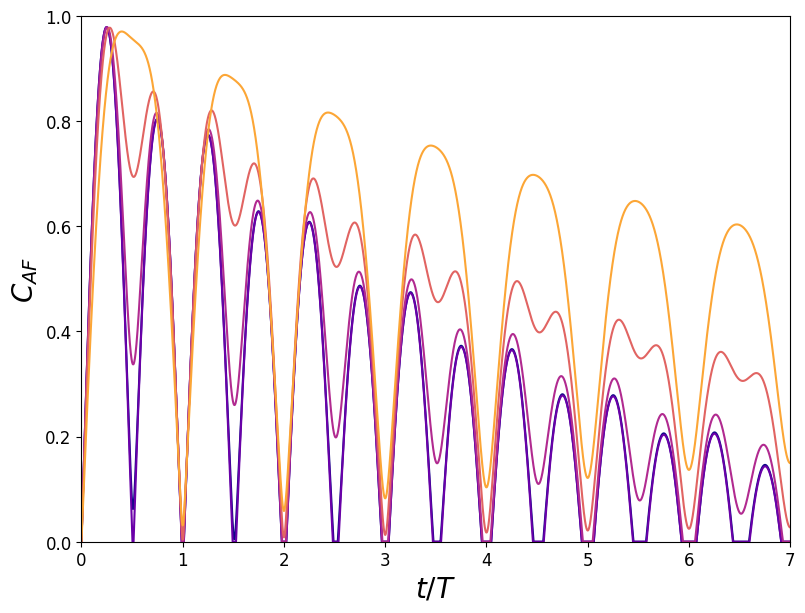

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g
delta=0.0999999*g
gamma=0.1*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

def cos_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)+delta)/(2*omega_n(n_,delta,0)))

def sin_theta_n(n_:int,delta:float):
    return np.sqrt((omega_n(n_,delta,0)-delta)/(2*omega_n(n_,delta,0)))

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
fig_concu=plt.figure(figsize=(8,6))
ax_concu=fig_concu.add_subplot()
colors=mpl.colormaps['plasma'](np.linspace(0,1,5+1))
for i,x in enumerate([0,0.1*g,0.5*g,g,2*g]):

    H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
    
    '''---Simulacion numerica---'''
    T=2*np.pi/omega_n(1,delta,x)
    t_final=7*T
    steps=10000
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
    psi0=e0

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    ax_concu.plot(t/T,concu,color=colors[i])

ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,7)
ax_concu.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
ax_concu.set_ylabel('$C_{AF}$',size=20)

ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)

DIFERENCIA ENTRE FASE UNITARIA Y DISIPATIVA PARA UN DADO TIEMPO EN FUNCION DEL DETUNNING PARA 3 DIFERENTES GAMMA

In [ ]:
delta=1*g
x=0
T=2*np.pi/omega_n(1,delta,x)
t_final=3*T
print(t_final)
delta_list=np.linspace(0.0000000001*g,15*g,151)
print(delta_list/g)


8429.777677248872
[1.00e-10 1.00e-01 2.00e-01 3.00e-01 4.00e-01 5.00e-01 6.00e-01 7.00e-01
 8.00e-01 9.00e-01 1.00e+00 1.10e+00 1.20e+00 1.30e+00 1.40e+00 1.50e+00
 1.60e+00 1.70e+00 1.80e+00 1.90e+00 2.00e+00 2.10e+00 2.20e+00 2.30e+00
 2.40e+00 2.50e+00 2.60e+00 2.70e+00 2.80e+00 2.90e+00 3.00e+00 3.10e+00
 3.20e+00 3.30e+00 3.40e+00 3.50e+00 3.60e+00 3.70e+00 3.80e+00 3.90e+00
 4.00e+00 4.10e+00 4.20e+00 4.30e+00 4.40e+00 4.50e+00 4.60e+00 4.70e+00
 4.80e+00 4.90e+00 5.00e+00 5.10e+00 5.20e+00 5.30e+00 5.40e+00 5.50e+00
 5.60e+00 5.70e+00 5.80e+00 5.90e+00 6.00e+00 6.10e+00 6.20e+00 6.30e+00
 6.40e+00 6.50e+00 6.60e+00 6.70e+00 6.80e+00 6.90e+00 7.00e+00 7.10e+00
 7.20e+00 7.30e+00 7.40e+00 7.50e+00 7.60e+00 7.70e+00 7.80e+00 7.90e+00
 8.00e+00 8.10e+00 8.20e+00 8.30e+00 8.40e+00 8.50e+00 8.60e+00 8.70e+00
 8.80e+00 8.90e+00 9.00e+00 9.10e+00 9.20e+00 9.30e+00 9.40e+00 9.50e+00
 9.60e+00 9.70e+00 9.80e+00 9.90e+00 1.00e+01 1.01e+01 1.02e+01 1.03e+01
 1.04e+01 1.05e+01 1.06e+01 1.07e

<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juego\AppData\Local\Temp\ipykernel_7980\1299712927.py:41: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)


(0.0, 15.0)

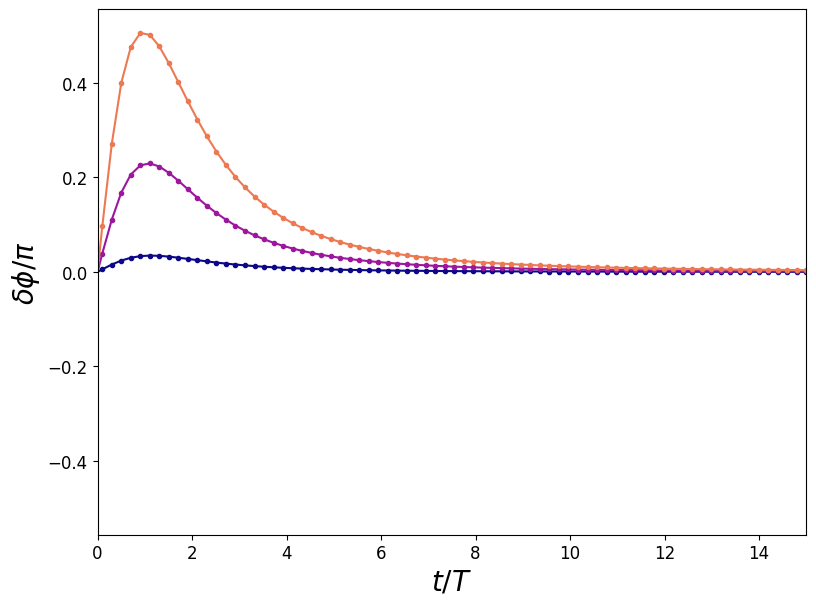

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g
gamma=0.1*g
x=0

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(-15*g,15*g,150)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=colormaps['plasma'](np.linspace(0,1,3+1))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):

        H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
        
        '''---Simulacion numerica---'''
        T=2*np.pi/omega_n(1,delta,x)
        t_final=3*T
        steps=10000
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        psi0=e0
        sol_u=mesolve(H,psi0,t)
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        

        fg_u,arg,eigenvals_t_d = fases(sol_u)


        fg_d,arg,eigenvals_t_d = fases(sol_d)
        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)
ax_fg.set_xlim(delta_list[0]/g,delta_list[-1]/g)



In [ ]:

delta_list=np.linspace(0.000001*g,15*g,151)
print(delta_list/g)

delta_list=np.delete(np.linspace(0.000001*g,15*g,151),5)
fg1=np.delete(np.loadtxt('robustezfg0x=0.5g.txt'),5)
fg2=np.loadtxt('robustezfg0x=0.5g.txt')
fg3=np.loadtxt('robustezfg0x=0.5g.txt')
plt.plot(delta_list/g,fg1,color='black')
plt.grid()
plt.vlines(0.5,-1,1)
plt.ylim(-0.075,0.12)

[1.00000000e-06 1.00000993e-01 2.00000987e-01 3.00000980e-01
 4.00000973e-01 5.00000967e-01 6.00000960e-01 7.00000953e-01
 8.00000947e-01 9.00000940e-01 1.00000093e+00 1.10000093e+00
 1.20000092e+00 1.30000091e+00 1.40000091e+00 1.50000090e+00
 1.60000089e+00 1.70000089e+00 1.80000088e+00 1.90000087e+00
 2.00000087e+00 2.10000086e+00 2.20000085e+00 2.30000085e+00
 2.40000084e+00 2.50000083e+00 2.60000083e+00 2.70000082e+00
 2.80000081e+00 2.90000081e+00 3.00000080e+00 3.10000079e+00
 3.20000079e+00 3.30000078e+00 3.40000077e+00 3.50000077e+00
 3.60000076e+00 3.70000075e+00 3.80000075e+00 3.90000074e+00
 4.00000073e+00 4.10000073e+00 4.20000072e+00 4.30000071e+00
 4.40000071e+00 4.50000070e+00 4.60000069e+00 4.70000069e+00
 4.80000068e+00 4.90000067e+00 5.00000067e+00 5.10000066e+00
 5.20000065e+00 5.30000065e+00 5.40000064e+00 5.50000063e+00
 5.60000063e+00 5.70000062e+00 5.80000061e+00 5.90000061e+00
 6.00000060e+00 6.10000059e+00 6.20000059e+00 6.30000058e+00
 6.40000057e+00 6.500000

FileNotFoundError: robustezfg0x=0.5g.txt not found.

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g
gamma=0.1*g
x=g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(-15*g,15*g,150)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=colormaps['plasma'](np.linspace(0,1,3))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):

        H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
        
        '''---Simulacion numerica---'''
        T=2*np.pi/omega_n(1,delta,x)
        t_final=3*T
        steps=10000
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        psi0=e0
        sol_u=mesolve(H,psi0,t)
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        

        fg_u,arg,eigenvals_t_d = fases(sol_u)


        fg_d,arg,eigenvals_t_d = fases(sol_d)
        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlim(delta_list[0],delta_list[-1])
ax_fg.grid()


DEPENDENCIA DE LA FASE GEOMETRICA CON EL MEDIO KERR

<>:41: SyntaxWarning: invalid escape sequence '\d'
<>:41: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juego\AppData\Local\Temp\ipykernel_2000\1580315367.py:41: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_2000\1580315367.py:41: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
d:\Estudios\two-interacting-atoms-in-disipative-JCM\jcm_lib.py:2538: SyntaxWarning: invalid escape sequence '\D'
  line0,=ax0.plot(g*data['t'], data['pr(gg0)'], color=blues[i+1],label=f'gg0, $\Delta={d_g}g$')
d:\Estudios\two-interacting-atoms-in-disipative-JCM\jcm_lib.py:2544: SyntaxWarning: invalid escape sequence '\D'
  line11,=ax1.plot(g*data['t'],data['pr(gg1)'],color=blues[i+1],label=f'gg1, $\Delta={d_g}g$')
d:\Estudios\two-interacting-atoms-in-disipative-JCM\jcm_lib.py:2545: SyntaxWarning: invalid escape sequence '\D'
  line12,=ax1.plot(g*data['t'],data['pr(eg0+ge0)'],c

KeyboardInterrupt: 

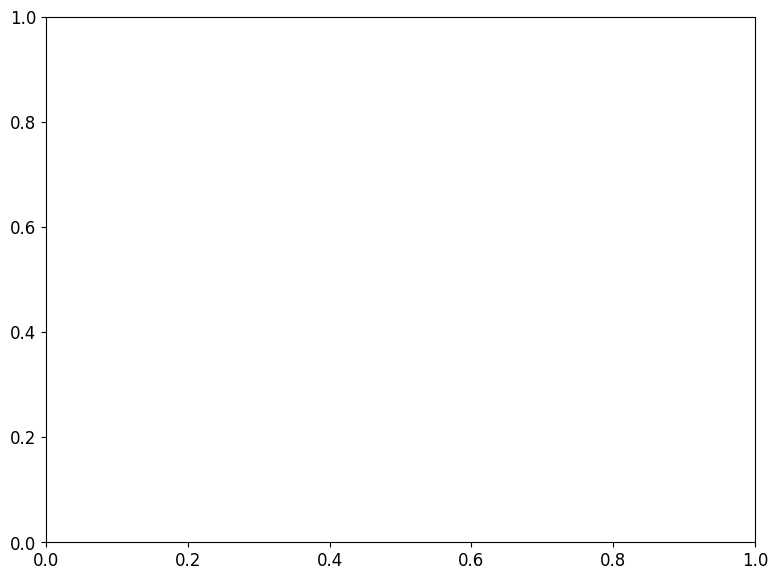

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g
gamma=0.1*g
delta=0.0999999999*g

def omega_n(n_:int,delta:float,x:float):
    return np.sqrt((delta-x*(2*n_-1))**2+4*g**2*n_)

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
chi_list=np.linspace(0.0000001*g,15*g,151)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=mpl.colormaps['plasma'](np.linspace(0,1,5))
    chifg=np.zeros(len(chi_list))
    for i,x in enumerate(chi_list):

        H=x*a.dag()*a*a.dag()*a+delta/2*sz + g*(a.dag()*sm+a*sp)
        
        '''---Simulacion numerica---'''
        T=2*np.pi/omega_n(1,delta,x)
        t_final=3*T
        steps=10000
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*sp] #operadores de colapso/lindblad
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        psi0=e0
        sol_u=mesolve(H,psi0,t)
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        

        fg_u,arg,eigenvals_t_d = fases(sol_u)


        fg_d,arg,eigenvals_t_d = fases(sol_d)
        chifg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(chi_list/g,chifg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlim(chi_list[0]/g,chi_list[-1]/g)

ax_fg.grid()
